<a href="https://www.kaggle.com/code/mohamedmustafashaban/student-job-fair?scriptVersionId=214493708" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **1- Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report,precision_score, roc_auc_score, confusion_matrix, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from warnings import filterwarnings
filterwarnings('ignore')
sns.set()
%matplotlib inline


## **2- read dataset**

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join('/kaggle/input/student-job-fair-data2','/kaggle/input/student-job-fair-data2/student_job_fair_data.csv'))

/kaggle/input/student-job-fair-data2/student_job_fair_data.csv


In [3]:
df = pd.read_csv("/kaggle/input/student-job-fair-data2/student_job_fair_data.csv" )

df.head()

,student_id,skills,experience_years,course_grades,projects_completed,extracurriculars,job_offer
0,1,Python;Data Analysis;SQL,3,75.26,9,0,1
1,2,Java,4,74.25,6,2,1
2,3,Data Analysis,2,74.89,4,3,0
3,4,Data Analysis,4,72.73,2,3,1
4,5,Machine Learning;Python;C++,4,84.85,1,4,0


## **3- information of The dataset**

In [4]:
df.isnull().sum()

student_id            0
skills                0
experience_years      0
course_grades         0
projects_completed    0
extracurriculars      0
job_offer             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          20000 non-null  int64  
 1   skills              20000 non-null  object 
 2   experience_years    20000 non-null  int64  
 3   course_grades       20000 non-null  float64
 4   projects_completed  20000 non-null  int64  
 5   extracurriculars    20000 non-null  int64  
 6   job_offer           20000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,20000.0,10000.500000,5773.647028,1.0,5000.7500,10000.50,15000.25,20000.0
experience_years,20000.0,2.499100,1.710861,0.0,1.0000,3.00,4.00,5.0
course_grades,20000.0,80.092985,11.519916,60.0,70.1275,80.17,90.00,100.0
projects_completed,20000.0,4.524850,2.860278,0.0,2.0000,5.00,7.00,9.0
extracurriculars,20000.0,1.997100,1.413397,0.0,1.0000,2.00,3.00,4.0
job_offer,20000.0,0.493750,0.499973,0.0,0.0000,0.00,1.00,1.0


In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(20000, 7)

## **4- preprocessing of the data**

In [9]:
encoder = LabelEncoder()

for col_name in df.columns:
    
    if df[col_name].dtype == "object":
        df[col_name] = encoder.fit_transform(df[[col_name]])

In [10]:
X = df.drop("job_offer",axis = 1)
X.head()

,student_id,skills,experience_years,course_grades,projects_completed,extracurriculars
0,1,114,3,75.26,9,0
1,2,52,4,74.25,6,2
2,3,26,2,74.89,4,3
3,4,26,4,72.73,2,3
4,5,95,4,84.85,1,4


In [11]:
y = df["job_offer"] 
y.head()

0    1
1    1
2    0
3    1
4    0
Name: job_offer, dtype: int64

## **5- Visualizing data**

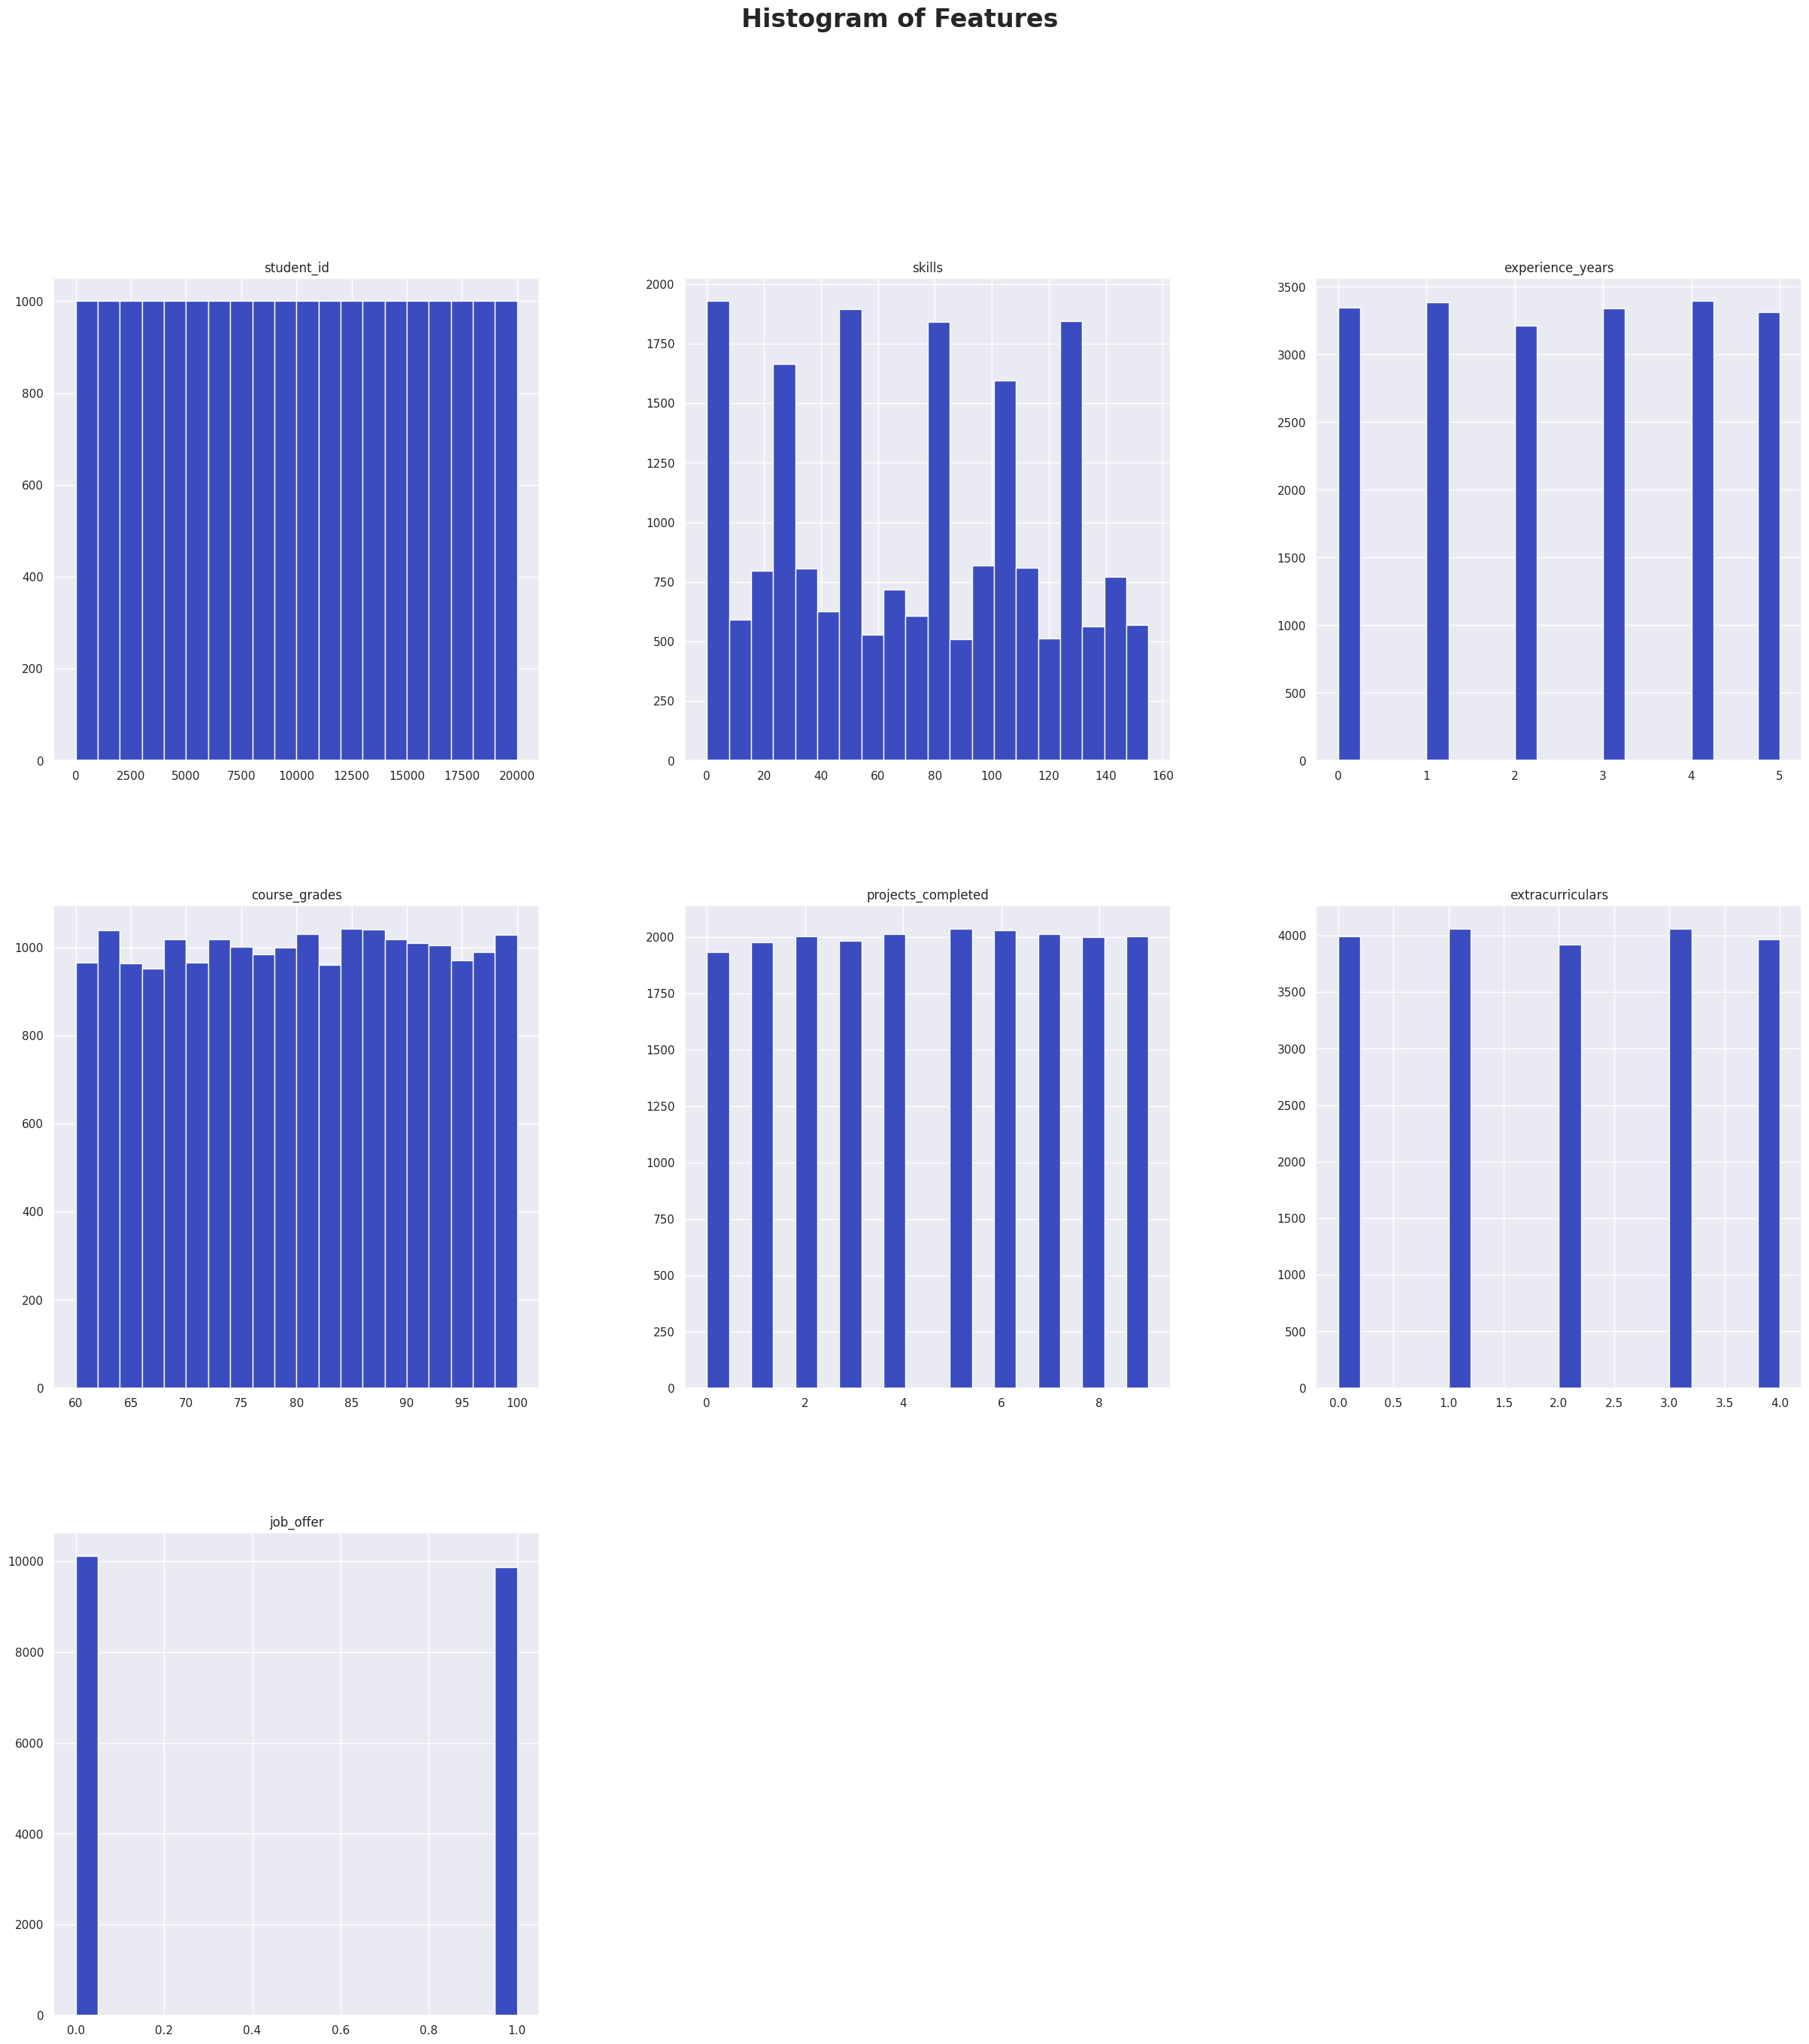

In [12]:
df.hist(bins=20, figsize=(30, 30), color=plt.get_cmap('coolwarm')(np.linspace(0, 1, 1)), grid=True)
hist_features = plt.suptitle('Histogram of Features',
                             y=1,
                             fontsize=24,
                             fontweight='bold')

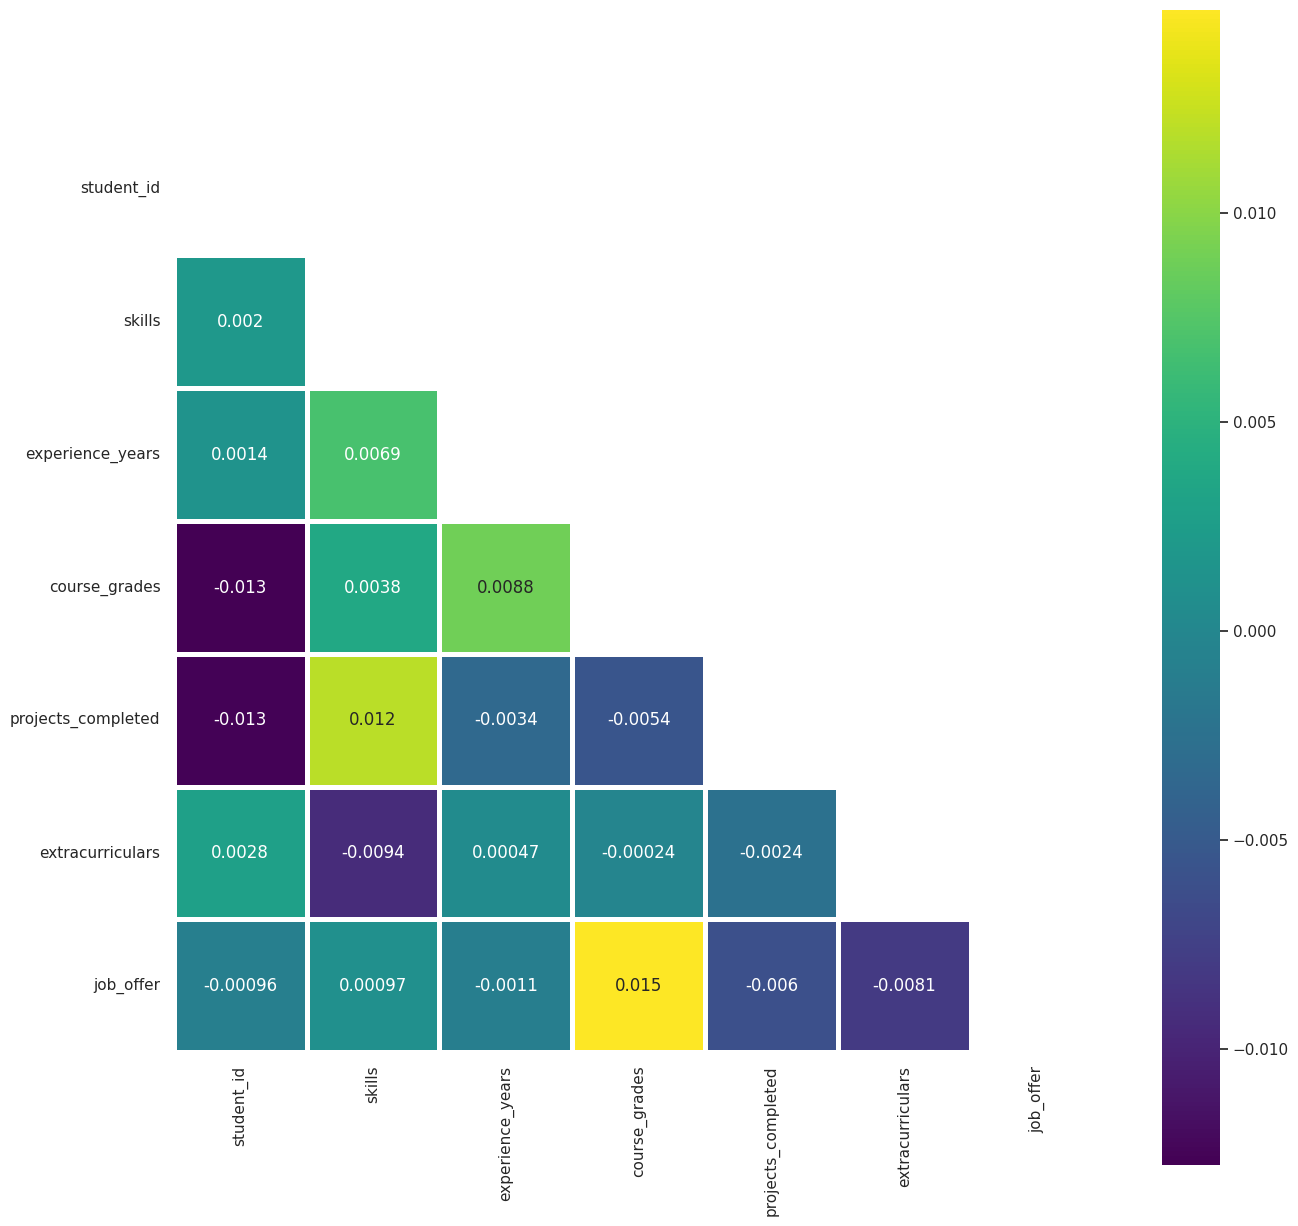

In [13]:

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=2.5,cmap="viridis",annot=True)



Text(0.5, 1.0, 'Correlation Matrix')

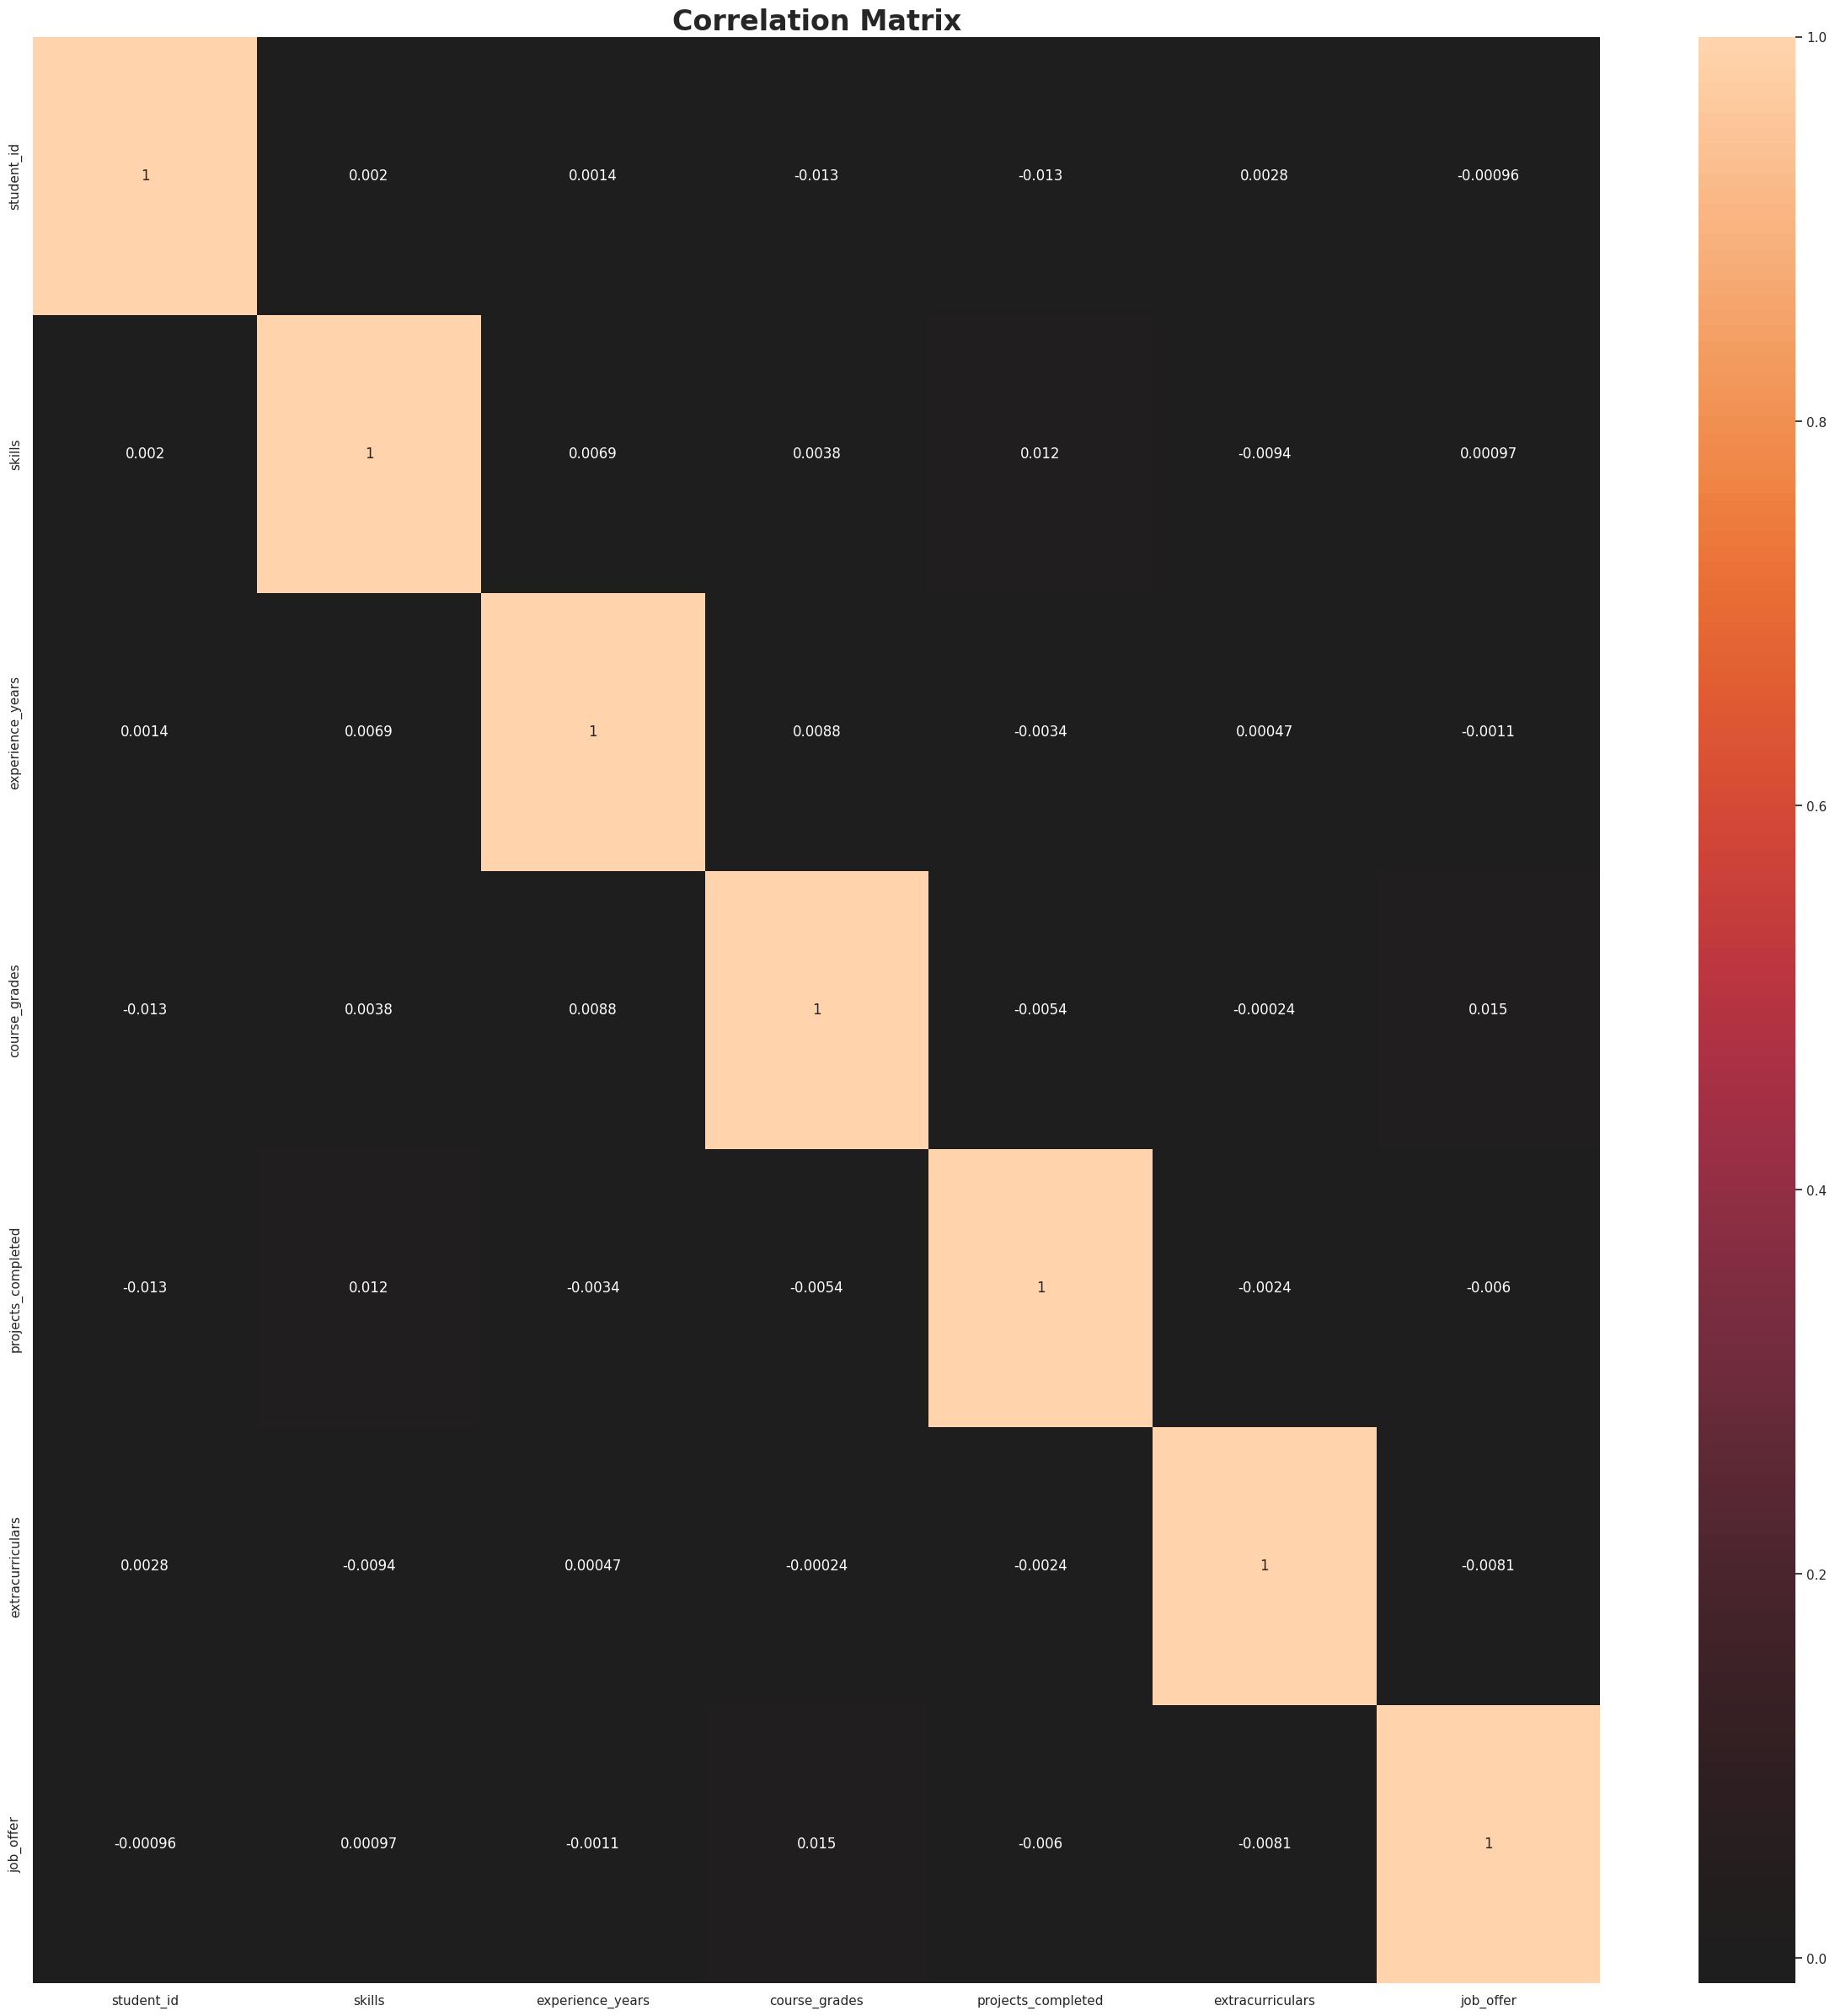

In [14]:
correlation_matrix = df.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, center=0)

plt.title('Correlation Matrix',
          fontsize=24,
          fontweight='bold')

In [15]:
def plot_learning_curve(estimator, title, X, y, ylim=None,
                        n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.title(title,
              fontsize=24,
              fontweight='bold')
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=10, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring='accuracy', shuffle=True, random_state=42)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.tight_layout()
    return plt

## **6-spliting data**

In [16]:
X, y = make_classification(n_samples=100, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75, 10), (25, 10), (75,), (25,))

In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train, y_train)
x_test = scaler.transform(X_test)

## **7- KNN_model_with a best pramter from gridsearch**

In [18]:
knn =KNeighborsClassifier()

In [19]:
param = {'n_neighbors': list(range(1, 30)), 'p':(1,2),
              'weights': ('uniform', 'distance'),
                   'metric': ('minkowski', 'chebyshev')}


In [20]:
Grid_model_knn= GridSearchCV(knn, param , cv= 5)

In [21]:
Grid_model_knn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': (1, 2), 'weights': ('uniform', 'distance')})

In [22]:
best_params_for_knn = Grid_model_knn.best_params_
print(Grid_model_knn.best_score_)

0.9733333333333334


In [23]:
knn = KNeighborsClassifier (**best_params_for_knn )
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8, p=1, weights='distance')

In [24]:
y_pred = knn.predict(X_test)
print("classification_report")
print(classification_report(y_test,y_pred))
print("accuracy ==" ,accuracy_score(y_test,y_pred) * 100)

classification_report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      1.00      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25

accuracy == 96.0


In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.96
Precision: 0.92
Recall: 1.00
F1-score: 0.96
ROC-AUC: 0.96


<Axes: >

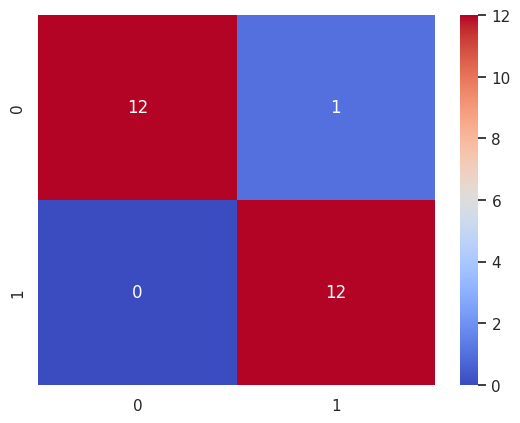

In [26]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot= True, cmap='coolwarm' )

## **8- LogisticRegression_with a best pramter from gridsearch**

In [27]:
log_model = LogisticRegression()

In [28]:
log_model.fit(X_train,y_train)


LogisticRegression()

In [29]:
y_pred= log_model.predict(X_test)
print("classification_report")
print(classification_report(y_test,y_pred))

classification_report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      1.00      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



In [30]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.96
Precision: 0.92
Recall: 1.00
F1-score: 0.96
ROC-AUC: 0.96


<Axes: >

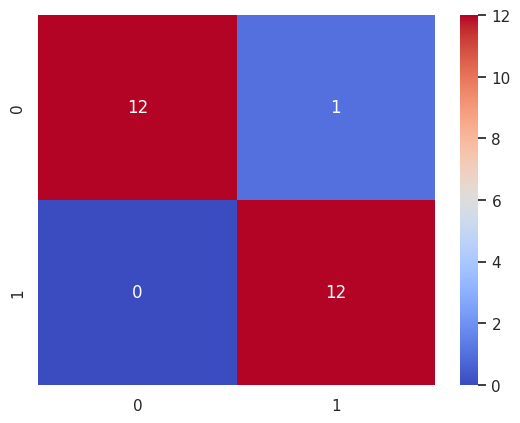

In [31]:
cm = confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm , annot= True ,cmap='coolwarm')


## **9-supper vector machine-classifier algorithm**

In [32]:
svc_classifier =SVC()
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
print("classification_report")
print( classification_report(y_test,y_pred_svc))


classification_report
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



In [33]:
y_pred = svc_classifier.predict(X_test)
print("classification_report")
print( classification_report(y_test,y_pred_svc))
print("accuracy ==" ,accuracy_score(y_test,y_pred_svc) * 100)

classification_report
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25

accuracy == 92.0


In [34]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.92
Precision: 0.86
Recall: 1.00
F1-score: 0.92
ROC-AUC: 0.92


<Axes: >

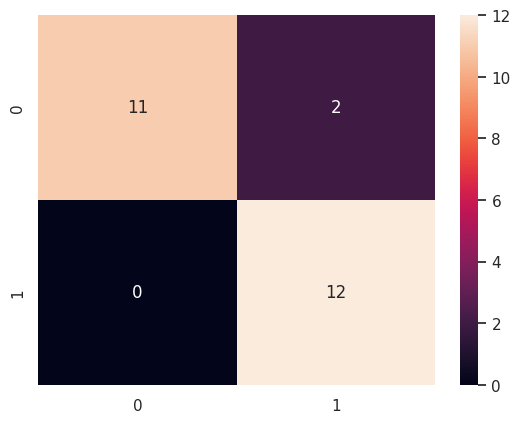

In [35]:
cm = confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm , annot= True)


## **9-Randomforest-classifier algorithm_with a best pramter from gridsearch**

In [36]:
rf = RandomForestClassifier()

In [37]:
paramr = {
           'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), paramr, cv=10)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [38]:
best_params_for_rf = grid_search_rf.best_params_

In [39]:
rf_classifier =RandomForestClassifier(**best_params_for_rf, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [40]:
y_pred = rf_classifier.predict(X_test)
print("classification_report")
print( classification_report(y_test,y_pred ))
print("accuracy == " ,accuracy_score(y_test,y_pred) * 100)

classification_report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      1.00      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25

accuracy ==  96.0


In [41]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.96
Precision: 0.92
Recall: 1.00
F1-score: 0.96
ROC-AUC: 0.96


<Axes: >

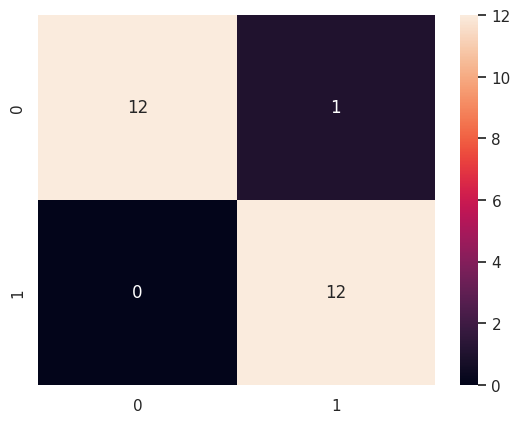

In [42]:
cm = confusion_matrix(y_test,y_pred )
ax = plt.subplot()
sns.heatmap(cm , annot= True)


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

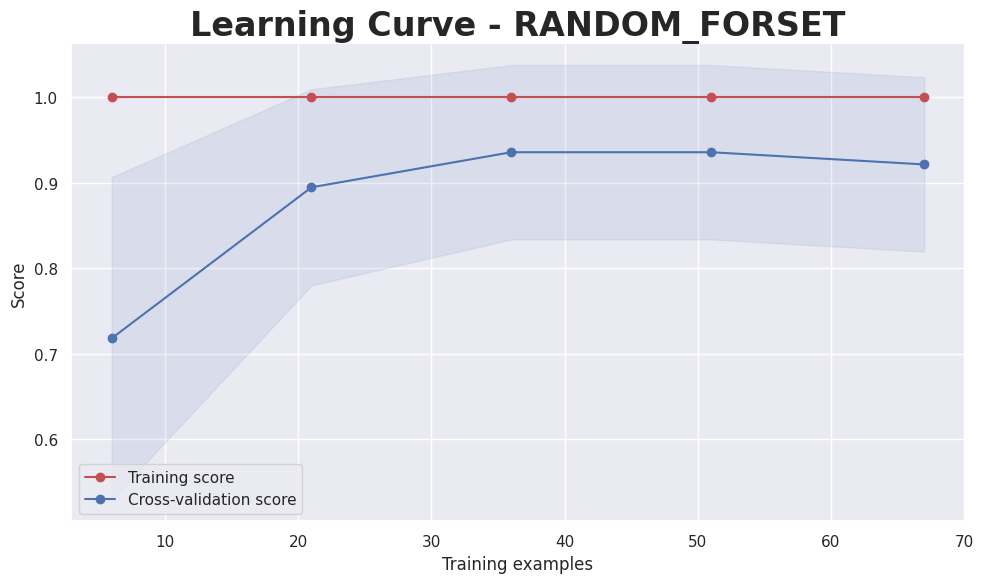

In [43]:
plot_learning_curve(grid_search_rf.best_estimator_, "Learning Curve - RANDOM_FORSET", X_train, y_train, n_jobs=-1)

## **10-DecisionTreeClassifier algorithm_with a best pramter from gridsearch**

In [44]:
param= {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [1, 5, 10],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2, 5, 10]}

grid_search_tree = GridSearchCV(DecisionTreeClassifier(),param , cv=10)
grid_search_tree.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10]})

In [45]:
best_params_for_tree = grid_search_tree.best_params_
print(best_params_for_tree)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5}


In [46]:
tree = DecisionTreeClassifier(**best_params_for_tree, random_state=42)
tree.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_split=5,
                       random_state=42)

In [47]:
y_pred = tree.predict(X_test)
print("classification_report", classification_report(y_test,y_pred))
print("accuracy== " , accuracy_score(y_test,y_pred) * 100)

classification_report               precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.91      0.83      0.87        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

accuracy==  88.0


In [48]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.88
Precision: 0.91
Recall: 0.83
F1-score: 0.87
ROC-AUC: 0.88


<Axes: >

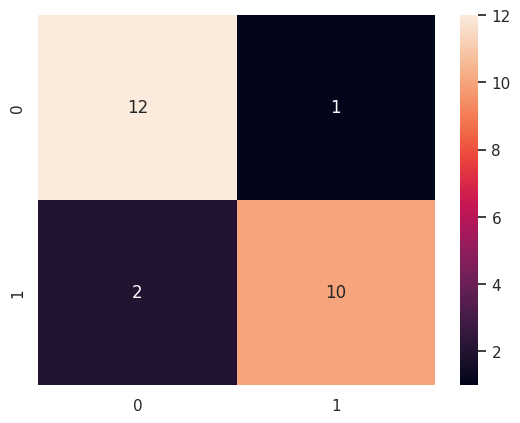

In [49]:
cm = confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm , annot= True)


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

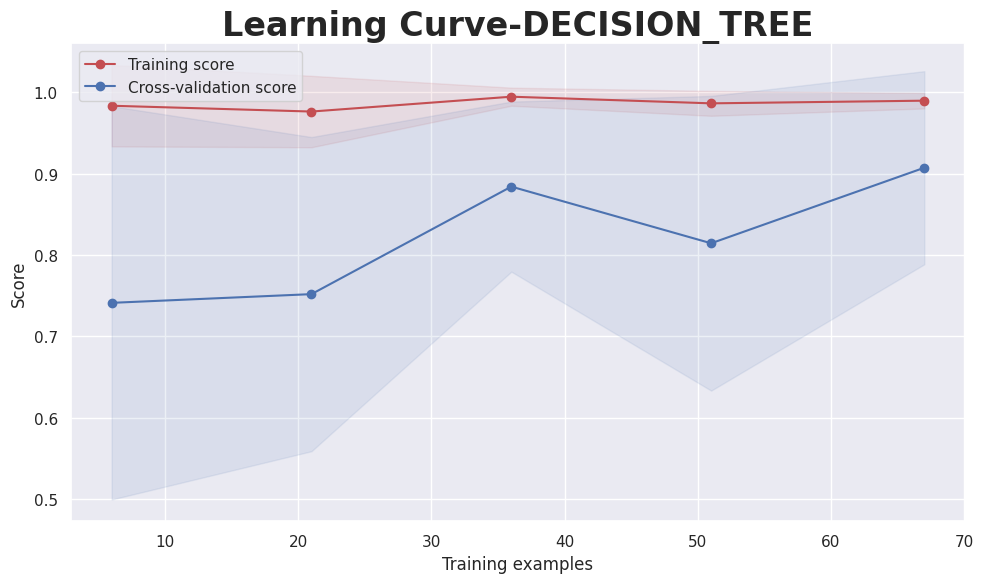

In [50]:
plot_learning_curve(grid_search_tree.best_estimator_, "Learning Curve-DECISION_TREE", X_train, y_train, n_jobs=-1)

## **11-GaussianNBClassifiersi algorithm_with a best pramter from gridsearch**

In [51]:
gs_model= GaussianNB()

In [52]:
gs_model.fit(X_train, y_train)


GaussianNB()

In [53]:
y_pred = tree.predict(X_test)
print("classification_report")
print( classification_report(y_test,y_pred))
print("accuracy==" ,accuracy_score(y_test,y_pred) * 100)

classification_report
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.91      0.83      0.87        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

accuracy== 88.0


In [54]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.88
Precision: 0.91
Recall: 0.83
F1-score: 0.87
ROC-AUC: 0.88


<Axes: >

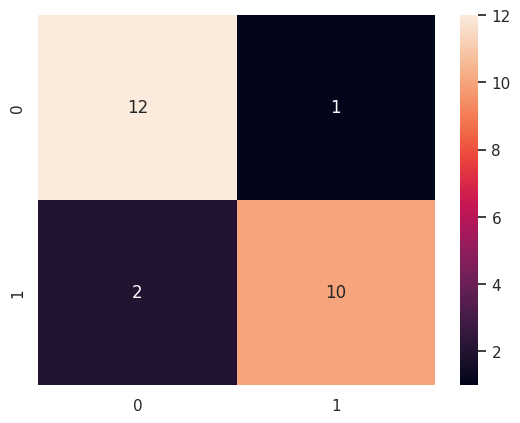

In [55]:
cm = confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm , annot= True)

## **12 -MLClassifiersi algorithm**

In [56]:
ml_classifer = MLPClassifier(hidden_layer_sizes=(100, 50),  
    activation='relu',  
    solver='adam',  
    alpha=0.001,
    batch_size='auto', 
    learning_rate='constant',  
    learning_rate_init=0.001,  
    max_iter=200, 
    shuffle=True,  )

ml_classifer.fit(X_train, y_train)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 50))

In [57]:
y_pred = ml_classifer.predict(X_test)
print("classification_report")
print( classification_report(y_test,y_pred))
print("accuracy ==" ,accuracy_score(y_test,y_pred) * 100)

classification_report
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25

accuracy == 92.0


In [58]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.92
Precision: 0.86
Recall: 1.00
F1-score: 0.92
ROC-AUC: 0.92


<Axes: >

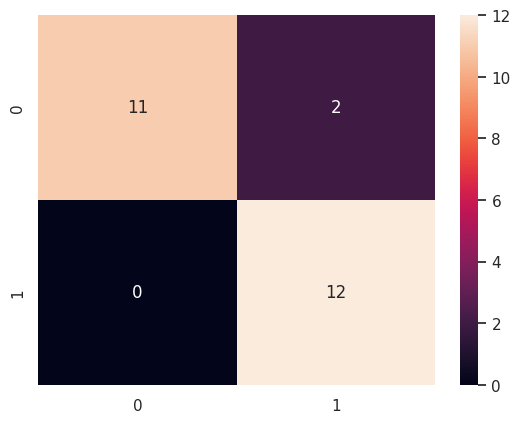

In [59]:
cm = confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm , annot= True)


## **13- xgboost algorithm**

In [60]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X_train, y_train)
y_pred=xgb_model.predict(X_test)
print("classification_report")
print( classification_report(y_test,y_pred ))
print("accuracy == " ,accuracy_score(y_test,y_pred) * 100)

classification_report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      1.00      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25

accuracy ==  96.0


In [61]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.96
Precision: 0.92
Recall: 1.00
F1-score: 0.96
ROC-AUC: 0.96


 # ***14-AdaBoost***

In [62]:
adaboost = AdaBoostClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}



In [63]:
grid_search = GridSearchCV(adaboost, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]})

In [64]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 50}
Best Accuracy: 0.9333333333333333
Test Accuracy: 0.96


In [65]:
best_params_for_ada = grid_search.best_estimator_.get_params()
adaboost = AdaBoostClassifier(**best_params_for_ada)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)

print("classification_report")
print(classification_report(y_test, y_pred))

print("accuracy =", accuracy_score(y_test, y_pred) * 100)


classification_report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      1.00      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25

accuracy = 96.0


In [66]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.96
Precision: 0.92
Recall: 1.00
F1-score: 0.96
ROC-AUC: 0.96


# ***15-GradientBoost***

In [67]:
gbm_classifier = GradientBoostingClassifier(random_state=42)
gbm_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [68]:
y_pred = gbm_classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.85      0.92      0.88        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

Accuracy: 88.00%


In [69]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.88
Precision: 0.85
Recall: 0.92
F1-score: 0.88
ROC-AUC: 0.88


# ***16-GradientBoost***

In [70]:
glm_classifier = GradientBoostingClassifier(subsample=.7, random_state=42)

glm_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42, subsample=0.7)

In [71]:
y_pred = glm_classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.92      0.92      0.92        12

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

Accuracy: 92.00%


In [72]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1-score: 0.92
ROC-AUC: 0.92
